# Python для анализа данных

## ДЗ 4

*Придумывал: Ян Пиле, НИУ ВШЭ*  

## Задача 1

Дана страница https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучший_фильм#Достижения_по_другим_номинациям_Оскара

Используя удобные для вас модули Python (Например requests, bs4 и pandas, но можно и любые другие) сгрузить в удобную для вас структуру данных (например pandas-табличку) данные о номинантах и победителях премии Оскар за лучший фильм за всю историю существования премии. Заметьте, на страничке эта информация в нескольких таблицах. По данным ответьте на вопросы. P.S. Результат нужно именно посчитать, если на странице в явном виде указан ответ на вопрос, просто выгрузить этот ответ нельзя:

    1. Сколько раз были номинированы фильмы, созданные при участии Стивена Спилберга?
    2. Фильмы какой компании получили больше Оскаров за лучший фильм: Warner Bros. или Paramount Pictures и насколько больше?

In [1]:
import requests

In [2]:
link='https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучший_фильм#Достижения_по_другим_номинациям_Оскара'

In [3]:
website_url=requests.get(link).text

In [4]:
from bs4 import BeautifulSoup
soup=BeautifulSoup(website_url,'lxml')

In [5]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="ru">
 <head>
  <meta charset="utf-8"/>
  <title>
   Премия «Оскар» за лучший фильм — Википедия
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","январь","февраль","март","апрель","май","июнь","июль","август","сентябрь","октябрь","ноябрь","декабрь"],"wgRequestId":"YEeg6kb215beNS1PakaCOQAAAIQ","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Премия_«Оскар»_за_лучший_фильм","wgTitle":"Премия «Оскар» за лучший фильм","wgCurRevisionId":111827675,"wgRevisionId":111827675,"wgArticleId":287076,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":[
"Википедия:Статьи с некорректным использованием шаблонов:Cite web (недоступные ссылки без архивной копии)","

In [8]:
tables=soup.find_all('table')
print(len(tables))

21


In [19]:
table=tables[0]
table

<table class="wikitable" style="width:100%;">
<tbody><tr style="background:#bebebe">
<th style="width:10%;">Год/Церемония
</th>
<th style="width:27%;">Фильм
</th>
<th style="width:27%;">Кинокомпания(и)
</th>
<th style="width:31%;">Продюсер(ы)
</th>
<th style="width:5%;">Ссылки
</th></tr>
<tr style="background:#FAEB86">
<td align="center" rowspan="3" style="background:#fff"><big><b><a href="/wiki/1929_%D0%B3%D0%BE%D0%B4_%D0%B2_%D0%BA%D0%B8%D0%BD%D0%BE" title="1929 год в кино">1929</a></b><br/></big> (<a href="/wiki/%D0%9E%D1%81%D0%BA%D0%B0%D1%80_(%D0%BA%D0%B8%D0%BD%D0%BE%D0%BF%D1%80%D0%B5%D0%BC%D0%B8%D1%8F,_1929)" title="Оскар (кинопремия, 1929)">1-я</a>)
</td>
<td>★ <b>«<a href="/wiki/%D0%9A%D1%80%D1%8B%D0%BB%D1%8C%D1%8F_(%D1%84%D0%B8%D0%BB%D1%8C%D0%BC,_1927)" title="Крылья (фильм, 1927)">Крылья</a>»</b>
</td>
<td><b><a href="/wiki/Paramount_Pictures" title="Paramount Pictures">Paramount Pictures</a>, <a href="/wiki/Famous_Players-Lasky" title="Famous Players-Lasky">Famous Players-Lask

In [21]:
import pandas as pd

df = pd.read_html(str(table))[0]
df.head()

,Год/Церемония,Фильм,Кинокомпания(и),Продюсер(ы),Ссылки
0,1929 (1-я),★ «Крылья»,"Paramount Pictures, Famous Players-Lasky",Люсьен Хаббард,[# 1]
1,1929 (1-я),«Рэкет»,"Caddo, Paramount",Говард Хьюз,[# 1]
2,1929 (1-я),«Седьмое небо»,Fox Film Corporation,Уильям Фокс,[# 1]
3,1930-I (2-я),★ «Бродвейская мелодия»,Metro-Goldwyn-Mayer,"Ирвинг Талберг, Лоуренс Уэйнгартен",[# 2]
4,1930-I (2-я),«Алиби»,"Feature Productions, United Artists",Роланд Уэст,[# 2]


In [ ]:
resp = requests.get('https://cbr.ru/currency_base/daily/')
tree = BeautifulSoup(resp.content, 'html.parser')

# нашли табличку
table = tree.find_all('table', {'class' : 'data'})[0]

# распарсили её
df = pd.read_html(str(table), header=-1)[0]
df.head()

## Задача 2

Дана страница https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучшую_женскую_роль

Используя удобные для вас модули Python (Например requests, bs4 и pandas, но можно и любые другие) сгрузить в удобную для вас структуру данных (например pandas-табличку) данные о номинантах и победителях премии Оскар за лучшую женскую роль за всю историю существования премии. Заметьте, на страничке эта информация в нескольких таблицах. По данным ответьте на вопросы. P.S. Результат нужно именно посчитать, если на странице в явном виде указан ответ на вопрос, просто выгрузить этот ответ нельзя:

    1. Какая актриса чаще всего номинировалась на Оскар?
    2. Насколько отличается количество номинаций самой часто номинировавшейся актрисы и второй по частоте?

## Задача 3

Дана страница https://www.worldometers.info/world-population/world-population-by-year/

На ней представлены данные о росте численности населения Земли. Используя удобные для вас модули Python (Например requests, bs4 и pandas, но можно и любые другие) сгрузить в удобную для вас структуру данных (например pandas-табличку) необходимые данные и нарисовать графики ежегодного прироста городского населения и ежегодного прироста общего населения, начиная с 1951 года. Если вы сгрузили данные в pandas-dataframe, графики можно построить так:

In [1]:
import pandas as pd
data = {'dt':['2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-05-01'],
'value':[1233, 23142,11445,32555,22234]}
df = pd.DataFrame(data)
df

,dt,value
0,2020-01-01,1233
1,2020-02-01,23142
2,2020-03-01,11445
3,2020-04-01,32555
4,2020-05-01,22234


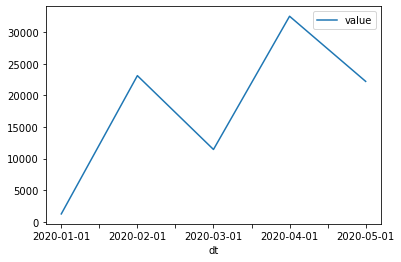

In [2]:
p = df.plot(x='dt', y='value')